In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
from sklearn import tree

In [2]:
df = pd.read_csv('AB.csv', na_values='?')
df.dropna(inplace=True)
df2 = pd.read_csv('AB.csv', na_values='?')
df2.dropna(inplace=True)

In [3]:
def change_status(Satus):
    if Satus == 'Operating':
        return 1;
    else :
        return 0;

In [4]:
def change_category(Categories):
    if Categories == 'Technology':
        return 0;
    elif Categories == 'Service_Ind':
        return 1;
    elif Categories == 'E-Commerce':
        return 2;
    elif Categories == 'Curated_Web':
        return 3;
    elif Categories == 'Advertising':
        return 4;
    elif Categories == 'Education':
        return 5;
    elif Categories == 'Finance':
        return 6;
    elif Categories == 'Fashion':
        return 7;
    elif Categories == 'Medical':
        return 8;

In [5]:
def change_funding(Amounts_raised_in_different_funding_rounds):
    if Amounts_raised_in_different_funding_rounds < 1:
        return 'zero'
    elif Amounts_raised_in_different_funding_rounds >1 :
        return Amounts_raised_in_different_funding_rounds;
#    elif Amounts_raised_in_different_funding_rounds < 100000 :
#        return 'Extremely_Low'
#    elif Amounts_raised_in_different_funding_rounds < 500000 :
#        return 'Low'
#    elif Amounts_raised_in_different_funding_rounds < 1000000 :
#        return 'medium'
#    elif Amounts_raised_in_different_funding_rounds < 5000000 :
 #       return 'High'
#    else:
#        return 'Extremely_High'

In [6]:
df['Satus'] = df['Satus'].apply(change_status)
df2['Satus'] = df2['Satus'].apply(change_status)
df2['Amounts_raised_in_different_funding_rounds'] = df2['Amounts_raised_in_different_funding_rounds'].apply(change_funding)
#df['YCombinatorYear'] = df['YCombinatorYear'].apply(change_year)
df['Categories'] = df['Categories'].apply(change_category)
df3 = df[df2.Amounts_raised_in_different_funding_rounds != 'zero' ]
df2.drop(['Company'], axis=1, inplace=True)
df3.drop(['Company', 'HeadquartersCity'], axis=1, inplace=True)
df3

D:\anaconda_cs210\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Satus,Amounts_raised_in_different_funding_rounds,Categories,YCombinatorYear
0,1,1200000,2,2011
1,1,3000000,2,2013
2,1,7300000,1,2012
3,0,2000000,0,2010
4,1,1714000,6,2010
6,1,2400000,1,2013
7,1,3800000,1,2012
8,0,1300000,3,2010
9,0,740000,3,2010
10,1,535000,6,2013


In [7]:
trainData = df3[:180]

In [8]:
trainData

,Satus,Amounts_raised_in_different_funding_rounds,Categories,YCombinatorYear
0,1,1200000,2,2011
1,1,3000000,2,2013
2,1,7300000,1,2012
3,0,2000000,0,2010
4,1,1714000,6,2010
6,1,2400000,1,2013
7,1,3800000,1,2012
8,0,1300000,3,2010
9,0,740000,3,2010
10,1,535000,6,2013


In [9]:
features = trainData.values[:, 1:4]
features

array([[   1200000,          2,       2011],
       [   3000000,          2,       2013],
       [   7300000,          1,       2012],
       [   2000000,          0,       2010],
       [   1714000,          6,       2010],
       [   2400000,          1,       2013],
       [   3800000,          1,       2012],
       [   1300000,          3,       2010],
       [    740000,          3,       2010],
       [    535000,          6,       2013],
       [    750000,          1,       2013],
       [   1800000,          3,       2012],
       [   9400000,          3,       2011],
       [   2800000,          0,       2011],
       [   2400000,          0,       2013],
       [   2500000,          1,       2012],
       [   2800000,          6,       2014],
       [  11200000,          0,       2011],
       [   1200000,          5,       2011],
       [  39800000,          0,       2010],
       [    700000,          6,       2013],
       [   2380000,          8,       2013],
       [  

In [10]:
a = trainData.values[:, 0:1]
targetlist = []
for i in range (0, 180):
    if (a[i] > 0):
        targetlist.append(1)
    else:
        targetlist.append(0)

In [11]:
targetarray = np.asarray(targetlist)
targetarray

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [12]:
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [13]:
clf.predict([[2., 2.]])

array([1])

In [14]:
clf.predict_proba([[2., 2.]])

array([[0., 1.]])

In [15]:
features

array([[   1200000,          2,       2011],
       [   3000000,          2,       2013],
       [   7300000,          1,       2012],
       [   2000000,          0,       2010],
       [   1714000,          6,       2010],
       [   2400000,          1,       2013],
       [   3800000,          1,       2012],
       [   1300000,          3,       2010],
       [    740000,          3,       2010],
       [    535000,          6,       2013],
       [    750000,          1,       2013],
       [   1800000,          3,       2012],
       [   9400000,          3,       2011],
       [   2800000,          0,       2011],
       [   2400000,          0,       2013],
       [   2500000,          1,       2012],
       [   2800000,          6,       2014],
       [  11200000,          0,       2011],
       [   1200000,          5,       2011],
       [  39800000,          0,       2010],
       [    700000,          6,       2013],
       [   2380000,          8,       2013],
       [  

In [16]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(features[:180, :], targetarray[:180])

In [17]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [18]:
with open('iris.dot', 'w') as f:
...     f = tree.export_graphviz(clf, out_file=f)

In [19]:
#from IPython.display import Image 
import os     
os.environ['PATH'] += os.pathsep + "C:/Users/ASUS-PC/Desktop/release/bin/"


In [20]:
import pydotplus
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_pdf('iris3.pdf')

True

In [21]:
feature_names = list(trainData.columns.values)

In [22]:
feature_names

['Satus',
 'Amounts_raised_in_different_funding_rounds',
 'Categories',
 'YCombinatorYear']

In [23]:
feature_names = feature_names[1:4]
feature_names

['Amounts_raised_in_different_funding_rounds', 'Categories', 'YCombinatorYear']

In [24]:
#target_names = ['low', 'lower-intermediate', 'upper-intermediate', 'high']
target_names =  list(trainData.columns.values)
target_names = target_names[0:2]
target_names = np.asarray(target_names)
target_names

array(['Satus', 'Amounts_raised_in_different_funding_rounds'],
      dtype='|S42')

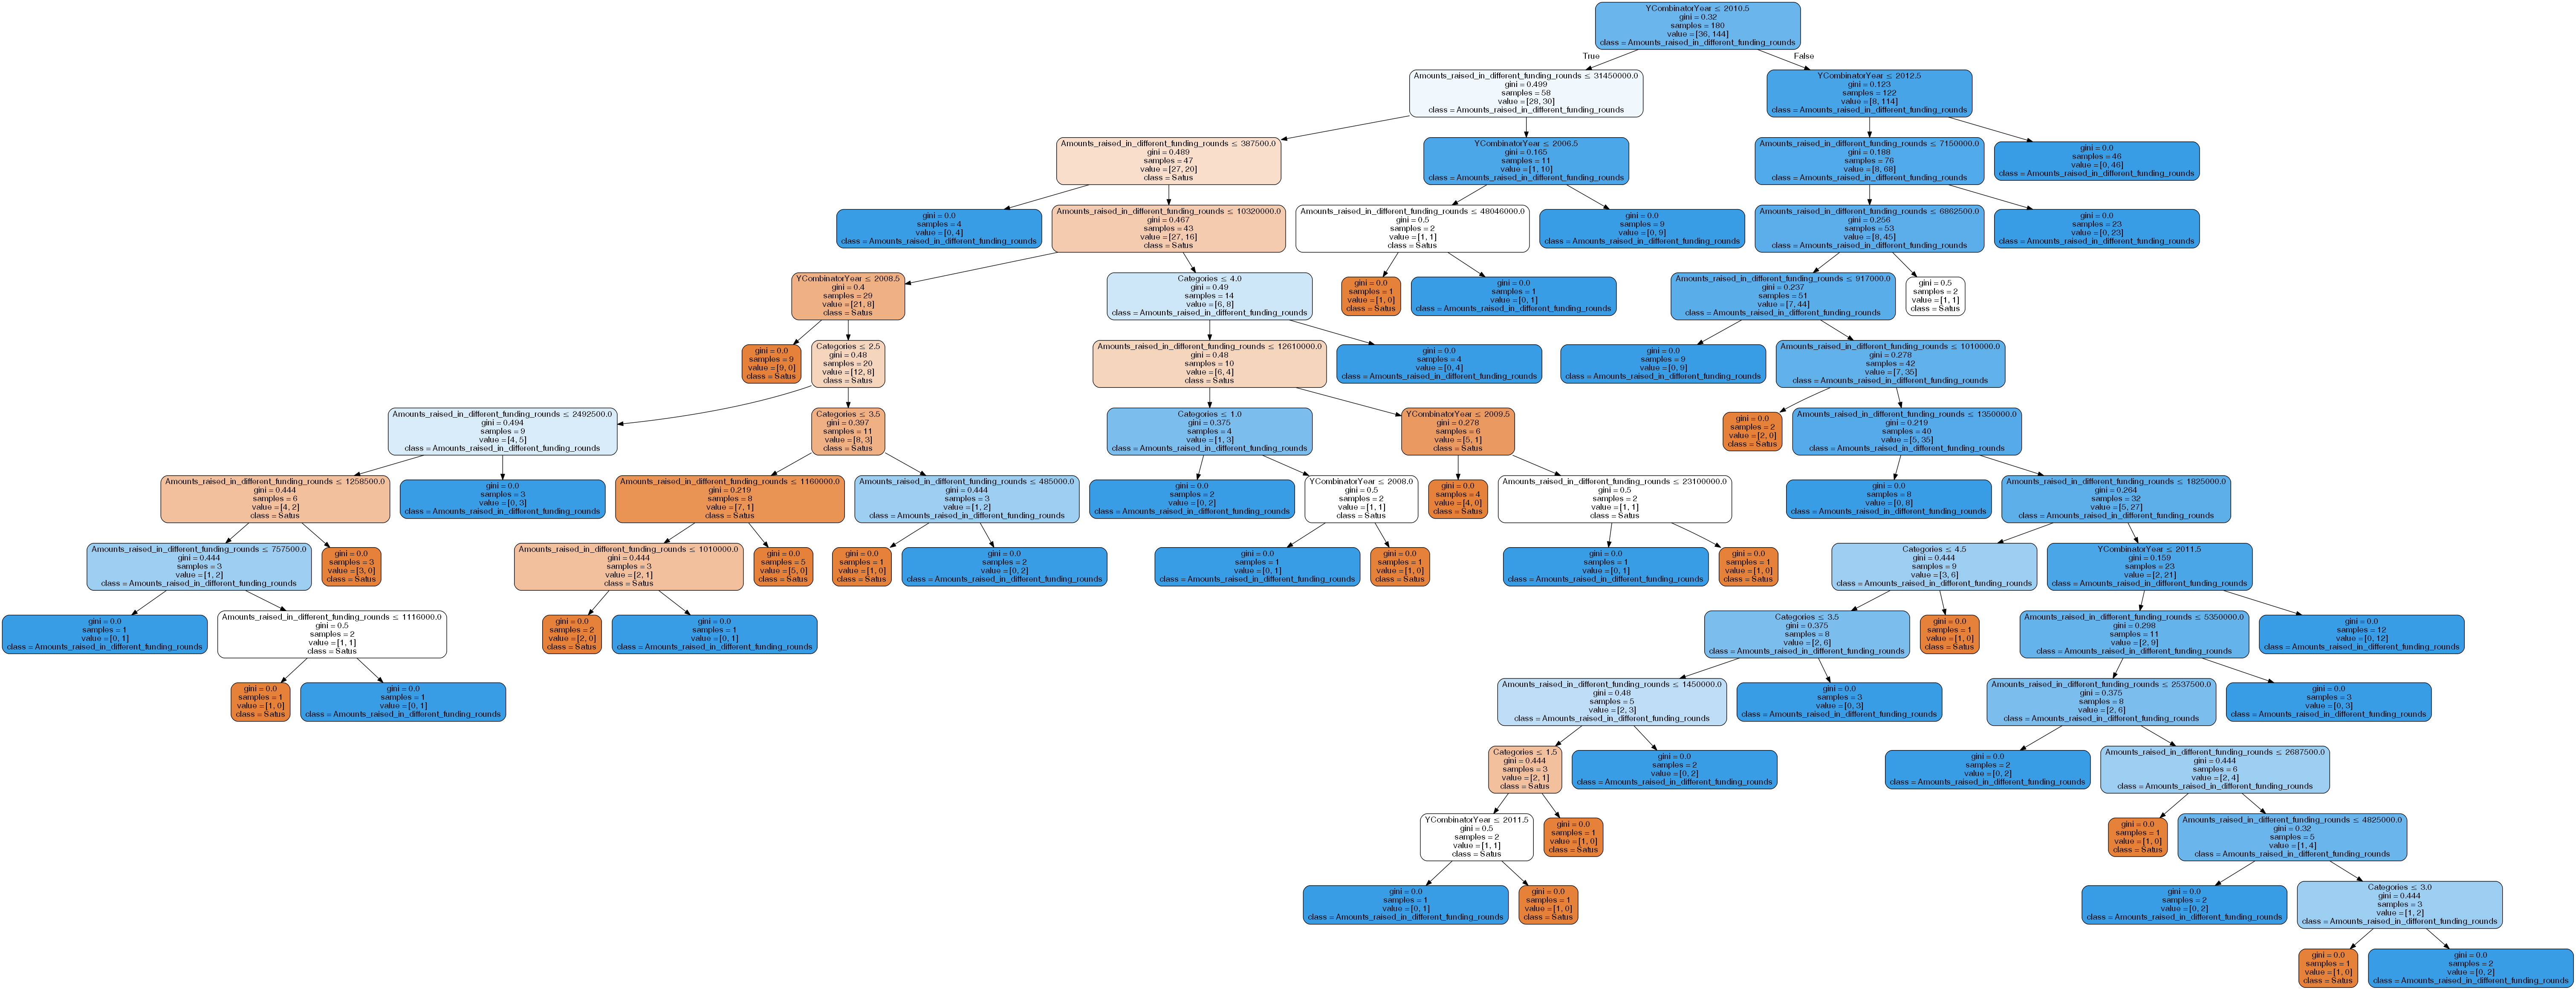

In [25]:
from IPython.display import Image  
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=feature_names,  
                         class_names=target_names, filled=True, rounded=True, special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_pdf('iris2.pdf')
Image(graph.create_png())  

In [26]:
features[0]
trainData[1:2]

,Satus,Amounts_raised_in_different_funding_rounds,Categories,YCombinatorYear
1,1,3000000,2,2013


In [27]:
clf.predict(features[1:4])

array([1, 1, 0])

In [28]:
testData = df3[180:]

In [29]:
testData

,Satus,Amounts_raised_in_different_funding_rounds,Categories,YCombinatorYear
251,1,4500000,8,2014
253,1,120000,8,2014
255,1,120000,0,2014
257,1,2025000,4,2014
258,1,622000,4,2014
259,1,15000,4,2007
264,1,289000,5,2014
267,1,120000,0,2014
269,1,1800000,6,2013
270,1,15000000,1,2011


In [30]:
t_features = testData.values[:, 1:4]
testData

,Satus,Amounts_raised_in_different_funding_rounds,Categories,YCombinatorYear
251,1,4500000,8,2014
253,1,120000,8,2014
255,1,120000,0,2014
257,1,2025000,4,2014
258,1,622000,4,2014
259,1,15000,4,2007
264,1,289000,5,2014
267,1,120000,0,2014
269,1,1800000,6,2013
270,1,15000000,1,2011


In [31]:
a = testData.values[:, 0:1]
t_targetlist = []
for i in range (0,108):
    if (a[i] > 0):
        t_targetlist.append(1)
    else:
        t_targetlist.append(0)

In [32]:
t_targetarray = np.asarray(t_targetlist)
t_targetarray

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1])

In [33]:
clf.score(features, targetarray)

0.9944444444444445

In [34]:
clf.score(t_features, t_targetarray)

0.8703703703703703

In [35]:
clf.predict(t_features[0:])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1])

In [36]:
clf.predict_proba(t_features[0:])

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.